# 1. Prepare the data

## Import Library and Dataset

In [1]:
# Import necessary libraries and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load dataset
stock_df = pd.read_csv('stock_trend.csv')

## Exploratory Data Analysis (EDA)

In [3]:
# Inspect first 10 rows
stock_df.head(10)

,Title,Time,Name,Quote,Before,After
0,100 startups participate in Maxis' Market Acce...,2019-12-12T23:50:12+08:00,MAXIS,6012,5.160,5.110
1,16.89% stake in Subur Tiasa traded off-market,2020-02-20T22:41:12+08:00,SUBUR,6904,0.610,0.610
2,Najib wanted 1MDB's Genting Sanyen deal sped u...,2020-07-16T17:42:30+08:00,GENTING,3182,4.080,4.060
3,"25bps OPR cut likely in 2H20, says Manulife",2020-01-16T17:03:43+08:00,MANULFE,1058,2.420,2.420
4,A 25-month extension on concession pushes Phar...,2019-11-11T10:49:58+08:00,PHARMA,7081,2.620,2.430
5,3.7% of Yong Tai transacted off-market,2019-09-05T19:55:54+08:00,YONGTAI,7066,0.195,0.200
6,"3A, Ruberex, Thriven, Kanger, UniWall",2020-03-04T13:23:15+08:00,KANGER,170,0.125,0.120
7,40% stake in IWH-CREC may cost Ekovest RM1.5b,2020-09-16T10:00:00+08:00,EKOVEST,8877,0.610,0.580
8,4.41% Kronologi Asia shares traded off-market,2020-02-12T23:54:51+08:00,KRONO,176,0.895,0.890
9,4.96% of MMAG traded off market,2019-07-23T22:42:17+08:00,MMAG,34,0.245,0.235


In [4]:
# Inspect last 10 rows
stock_df.tail(10)

,Title,Time,Name,Quote,Before,After
24378,"Zhulian, Ancom, Key Asic, George Kent, Johan, ...",2017-10-11T22:33:02+08:00,GKENT,3204,3.230000,3.290000
24379,"Zhulian, Ancom, Key Asic, George Kent, Johan, ...",2017-10-11T22:33:02+08:00,JOHAN,3441,0.260000,0.280000
24380,"Zhulian, Ancom, Key Asic, George Kent, Johan, ...",2017-10-11T22:33:02+08:00,ANCOM,4758,0.620769,0.629451
24381,"Zhulian, Ancom, Key Asic, George Kent, Johan, ...",2017-10-11T22:33:02+08:00,ZHULIAN,5131,1.640000,1.790000
24382,"Zhulian, Ancom, Key Asic, George Kent, Johan, ...",2017-10-11T22:33:02+08:00,DATAPRP,8338,0.335000,0.290000
24383,Zhulian falls 11.01% after 4Q earnings decline...,2018-01-25T09:34:22+08:00,ZHULIAN,5131,1.920000,1.810000
24384,"Zhulian jumps 6.71% on 3Q earnings, dividend",2017-10-12T09:25:06+08:00,ZHULIAN,5131,1.740000,1.790000
24385,"Zhulian may climb higher, says RHB Retail Rese...",2018-01-24T08:23:37+08:00,ZHULIAN,5131,2.100000,2.090000
24386,"Zhulian may rise higher, says RHB Retail Research",2017-11-13T08:22:46+08:00,ZHULIAN,5131,1.900000,1.890000
24387,"Zhulian posts 38% lower 1Q earnings, pays 2 se...",2018-04-18T18:25:04+08:00,ZHULIAN,5131,1.470000,1.420000


In [5]:
# Check the shape of the dataset through row and column
stock_df.shape

(24388, 6)

In [6]:
# Check data types of each column
stock_df.dtypes

Title      object
Time       object
Name       object
Quote       int64
Before    float64
After     float64
dtype: object

In [7]:
# Ensure Quote is string and zero-padded to 4 digits
stock_df["Quote"] = stock_df["Quote"].astype(str).str.zfill(4)

In [8]:
# Check again data types for each column
stock_df.dtypes

Title      object
Time       object
Name       object
Quote      object
Before    float64
After     float64
dtype: object

In [ ]:
# Inspect first 10 rows
stock_df.head(10)

,Title,Time,Name,Quote,Before,After
0,100 startups participate in Maxis' Market Acce...,2019-12-12T23:50:12+08:00,MAXIS,6012,5.160,5.110
1,16.89% stake in Subur Tiasa traded off-market,2020-02-20T22:41:12+08:00,SUBUR,6904,0.610,0.610
2,Najib wanted 1MDB's Genting Sanyen deal sped u...,2020-07-16T17:42:30+08:00,GENTING,3182,4.080,4.060
3,"25bps OPR cut likely in 2H20, says Manulife",2020-01-16T17:03:43+08:00,MANULFE,1058,2.420,2.420
4,A 25-month extension on concession pushes Phar...,2019-11-11T10:49:58+08:00,PHARMA,7081,2.620,2.430
5,3.7% of Yong Tai transacted off-market,2019-09-05T19:55:54+08:00,YONGTAI,7066,0.195,0.200
6,"3A, Ruberex, Thriven, Kanger, UniWall",2020-03-04T13:23:15+08:00,KANGER,0170,0.125,0.120
7,40% stake in IWH-CREC may cost Ekovest RM1.5b,2020-09-16T10:00:00+08:00,EKOVEST,8877,0.610,0.580
8,4.41% Kronologi Asia shares traded off-market,2020-02-12T23:54:51+08:00,KRONO,0176,0.895,0.890
9,4.96% of MMAG traded off market,2019-07-23T22:42:17+08:00,MMAG,0034,0.245,0.235


In [10]:
# Check for missing values in the dataset
stock_df.isnull().sum()

Title     0
Time      0
Name      0
Quote     0
Before    0
After     0
dtype: int64

In [11]:
# Summary of statistics for whole dataset
stock_df.describe()

,Before,After
count,24388.000000,24388.000000
mean,2.633888,2.637278
std,7.679378,7.649474
min,0.005000,0.005000
25%,0.475000,0.480000
50%,1.070000,1.070000
75%,3.010000,3.020000
max,159.100006,157.399994


In [12]:
# Summary statistics for stock prices
stock_df[['Before', 'After']].describe()

,Before,After
count,24388.000000,24388.000000
mean,2.633888,2.637278
std,7.679378,7.649474
min,0.005000,0.005000
25%,0.475000,0.480000
50%,1.070000,1.070000
75%,3.010000,3.020000
max,159.100006,157.399994


In [13]:
# Raw Price Movement
# Calculate price movement
stock_df['Price_Movement'] = stock_df['After'] - stock_df['Before']

# Classify price movement direction
# 'up' for increase, 'down' for decrease, 'no_change' for no change
direction = stock_df['Price_Movement'].apply(lambda x: 'up' if x > 0 else ('down' if x < 0 else 'no_change'))

# Count occurrences of each direction
direction.value_counts()


Price_Movement
up           10726
down          9321
no_change     4341
Name: count, dtype: int64

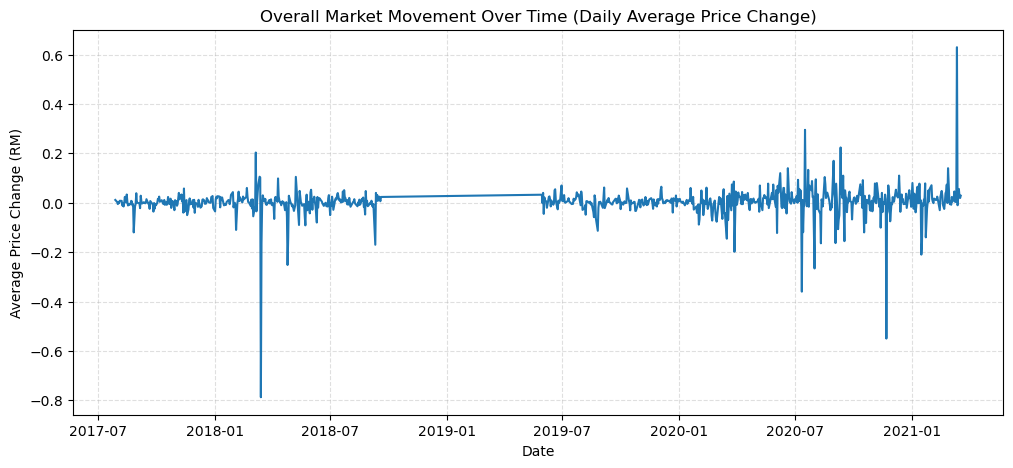

In [14]:
# Create a temporary datetime column 
temp_time = pd.to_datetime(stock_df["Time"])

# Extract date into a temporary variable
temp_date = temp_time.dt.date

# Compute daily average price movement
daily_avg_movement = stock_df["Price_Movement"].groupby(temp_date).mean()

# Plot
plt.figure(figsize=(12,5))
daily_avg_movement.plot()

plt.title("Overall Market Movement Over Time (Daily Average Price Change)")
plt.xlabel("Date")
plt.ylabel("Average Price Change (RM)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()



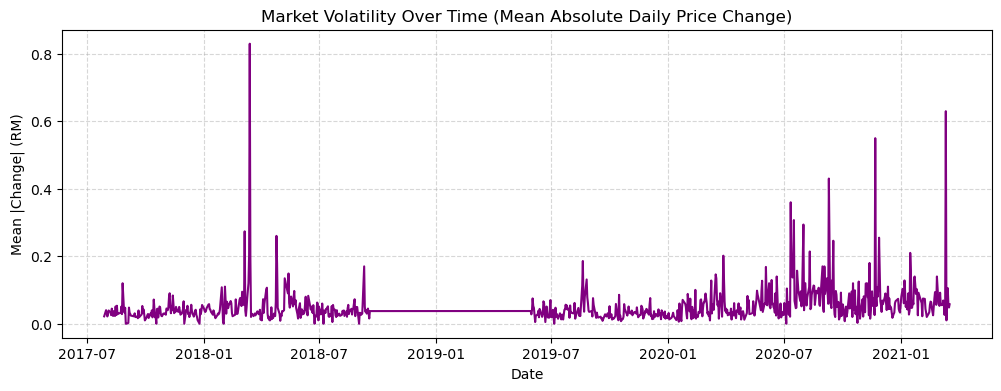

In [15]:
# Create a temporary absolute change Series
temp_abs_change = stock_df["Price_Movement"].abs()

# Create a temporary datetime column
temp_time = pd.to_datetime(stock_df["Time"])
temp_date = temp_time.dt.date

# Group by date to get daily mean absolute price change
daily_vol = temp_abs_change.groupby(temp_date).mean()

# Plot
plt.figure(figsize=(12,4))
daily_vol.plot(color="purple")

plt.title("Market Volatility Over Time (Mean Absolute Daily Price Change)")
plt.xlabel("Date")
plt.ylabel("Mean |Change| (RM)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


## Data Preprocessing

### Compute Relative Price Change (%)

In [16]:
# Compute relative price change percentage
stock_df["Relative_Price_Change"] = (stock_df["Price_Movement"] / stock_df["Before"]) * 100

# Inspect first 10 rows with new columns
stock_df.head(10)

,Title,Time,Name,Quote,Before,After,Price_Movement,Relative_Price_Change
0,100 startups participate in Maxis' Market Acce...,2019-12-12T23:50:12+08:00,MAXIS,6012,5.160,5.110,-0.050,-0.968992
1,16.89% stake in Subur Tiasa traded off-market,2020-02-20T22:41:12+08:00,SUBUR,6904,0.610,0.610,0.000,0.000000
2,Najib wanted 1MDB's Genting Sanyen deal sped u...,2020-07-16T17:42:30+08:00,GENTING,3182,4.080,4.060,-0.020,-0.490196
3,"25bps OPR cut likely in 2H20, says Manulife",2020-01-16T17:03:43+08:00,MANULFE,1058,2.420,2.420,0.000,0.000000
4,A 25-month extension on concession pushes Phar...,2019-11-11T10:49:58+08:00,PHARMA,7081,2.620,2.430,-0.190,-7.251908
5,3.7% of Yong Tai transacted off-market,2019-09-05T19:55:54+08:00,YONGTAI,7066,0.195,0.200,0.005,2.564103
6,"3A, Ruberex, Thriven, Kanger, UniWall",2020-03-04T13:23:15+08:00,KANGER,0170,0.125,0.120,-0.005,-4.000000
7,40% stake in IWH-CREC may cost Ekovest RM1.5b,2020-09-16T10:00:00+08:00,EKOVEST,8877,0.610,0.580,-0.030,-4.918033
8,4.41% Kronologi Asia shares traded off-market,2020-02-12T23:54:51+08:00,KRONO,0176,0.895,0.890,-0.005,-0.558659
9,4.96% of MMAG traded off market,2019-07-23T22:42:17+08:00,MMAG,0034,0.245,0.235,-0.010,-4.081633


### Label Function

In [17]:
# Label Function
def label_trend(percentage_change):
    if percentage_change > 10:
        return 'uptrend'
    elif percentage_change < -10:
        return 'downtrend'
    else:
        return 'flat'

### Assign Label

In [18]:
# Apply labeling function to create 'Trend_Label' column
stock_df['Trend_Label'] = stock_df['Relative_Price_Change'].apply(label_trend)

# Inspect first 10 rows with Trend_Label
stock_df.head(10)

,Title,Time,Name,Quote,Before,After,Price_Movement,Relative_Price_Change,Trend_Label
0,100 startups participate in Maxis' Market Acce...,2019-12-12T23:50:12+08:00,MAXIS,6012,5.160,5.110,-0.050,-0.968992,flat
1,16.89% stake in Subur Tiasa traded off-market,2020-02-20T22:41:12+08:00,SUBUR,6904,0.610,0.610,0.000,0.000000,flat
2,Najib wanted 1MDB's Genting Sanyen deal sped u...,2020-07-16T17:42:30+08:00,GENTING,3182,4.080,4.060,-0.020,-0.490196,flat
3,"25bps OPR cut likely in 2H20, says Manulife",2020-01-16T17:03:43+08:00,MANULFE,1058,2.420,2.420,0.000,0.000000,flat
4,A 25-month extension on concession pushes Phar...,2019-11-11T10:49:58+08:00,PHARMA,7081,2.620,2.430,-0.190,-7.251908,flat
5,3.7% of Yong Tai transacted off-market,2019-09-05T19:55:54+08:00,YONGTAI,7066,0.195,0.200,0.005,2.564103,flat
6,"3A, Ruberex, Thriven, Kanger, UniWall",2020-03-04T13:23:15+08:00,KANGER,0170,0.125,0.120,-0.005,-4.000000,flat
7,40% stake in IWH-CREC may cost Ekovest RM1.5b,2020-09-16T10:00:00+08:00,EKOVEST,8877,0.610,0.580,-0.030,-4.918033,flat
8,4.41% Kronologi Asia shares traded off-market,2020-02-12T23:54:51+08:00,KRONO,0176,0.895,0.890,-0.005,-0.558659,flat
9,4.96% of MMAG traded off market,2019-07-23T22:42:17+08:00,MMAG,0034,0.245,0.235,-0.010,-4.081633,flat


### Check the class distribution for Trend_Label

In [19]:
# Count occurrences of each trend label
stock_df['Trend_Label'].value_counts()

Trend_Label
flat         22626
uptrend       1232
downtrend      530
Name: count, dtype: int64

### Split dataset into train(70%), validate(20%) and test(10%)

In [20]:
# Split dataset into train, validate and test sets
train_df, temp_df = train_test_split(stock_df, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=1/3, random_state=42)

print("Train size:", len(train_df))
print("Validation size:", len(val_df))
print("Test size:", len(test_df))

Train size: 17071
Validation size: 4878
Test size: 2439


In [21]:
# Inspect first 10 rows of training set
train_df.head(10)

,Title,Time,Name,Quote,Before,After,Price_Movement,Relative_Price_Change,Trend_Label
5453,Hospital bed supplier LKL plans Covid-19 conta...,2021-02-09T13:32:13+08:00,LKL,0182,0.760000,0.765000,0.005000,0.657895,flat
5230,Higher taxation squeezes Hibiscus Petroleum’s ...,2020-02-25T21:40:28+08:00,HIBISCS,5199,0.880000,0.845000,-0.035000,-3.977273,flat
20866,Rosy prospects seen to remain for Sunway,2018-03-29T11:00:28+08:00,SUNWAY,5211,1.539064,1.548867,0.009803,0.636946,flat
4021,"FGV, MSM, Kerjaya Prospek, APFT, Dolphin Inter...",2020-01-08T23:21:39+08:00,KERJAYA,7161,1.257425,1.277227,0.019802,1.574806,flat
10299,Straits Inter Logistics up 4.44% on oil tanker...,2019-06-17T10:52:19+08:00,STRAITS,0080,0.225000,0.230000,0.005000,2.222222,flat
13317,Berjaya Assets may announce new venture with A...,2017-08-08T16:47:56+08:00,BJCORP,3395,0.312500,0.317307,0.004807,1.538240,flat
19036,MK Land set to sell off RM362.9m worth of unso...,2017-12-13T15:38:41+08:00,MKLAND,8893,0.235000,0.240000,0.005000,2.127660,flat
6228,Key Alliance plans rights issue with warrants ...,2020-08-06T22:29:22+08:00,KGROUP,0036,0.102857,0.094285,-0.008572,-8.333900,flat
19105,"MMS Ventures, Palette Multimedia, Xinghe, Poh ...",2017-08-29T14:44:58+08:00,XINGHE,0095,0.360000,0.360000,0.000000,0.000000,flat
17758,Kejuruteraan Asastera seeks acquisitions,2018-05-21T08:55:13+08:00,KAB,0193,0.103688,0.105682,0.001994,1.923077,flat


In [22]:
# Inspect first 10 rows of validation set
val_df.head(10)

,Title,Time,Name,Quote,Before,After,Price_Movement,Relative_Price_Change,Trend_Label
4286,"Gamuda, KNM, Kerjaya Prospek, Apex Equity, Ser...",2019-10-02T23:39:00+08:00,AIRASIA,5099,1.740000,1.700000,-0.040000,-2.298851,flat
20505,"Public Bank, Press Metal, KLCCP, CIMB Group, P...",2018-08-15T23:17:10+08:00,CIMB,1023,5.880000,5.880000,0.000000,0.000000,flat
3579,"Duopharma, Pharmaniaga, Atrium REIT, PNE PCB, ...",2021-01-26T23:37:37+08:00,CIHLDG,2828,1.840000,1.900000,0.060000,3.260870,flat
462,"AirAsia, AAX pay MAHB RM41.55m in uncollected PSC",2019-09-19T19:26:03+08:00,AIRASIA,5099,1.790000,1.810000,0.020000,1.117318,flat
22179,Stock With Momentum: NTPM Holdings,2018-05-21T10:46:59+08:00,NTPM,5066,0.645000,0.650000,0.005000,0.775194,flat
4832,Great Eastern buys 22% ‘strategic’ stake in Ax...,2020-06-25T18:08:36+08:00,AXIATA,6888,3.390000,3.460000,0.070000,2.064897,flat
16647,Hap Seng ‘underestimated’ due diligence needed...,2018-05-31T09:06:18+08:00,KRETAM,1996,0.800000,0.800000,0.000000,0.000000,flat
15903,"F&N, Nestle, Gas Malaysia, Sime Darby, GHL, Ha...",2017-11-08T00:47:18+08:00,KGROUP,0036,0.145714,0.149999,0.004285,2.940692,flat
20820,RHB Research starts coverage on Southern Acids...,2017-10-04T09:04:26+08:00,SAB,5134,4.580000,4.600000,0.020000,0.436681,flat
12860,Apex Equity appoints former IGP as director,2018-03-26T20:27:59+08:00,APEX,5088,1.038095,1.028571,-0.009524,-0.917450,flat


In [23]:
# Inspect first 10 rows of test set
test_df.head(10)

,Title,Time,Name,Quote,Before,After,Price_Movement,Relative_Price_Change,Trend_Label
2334,Cahya Mata Sarawak jumps among Bursa top gainers,2019-10-24T09:50:30+08:00,CMSB,2852,2.360000,2.440000,0.080000,3.389831,flat
20413,"Priceworth, TFP Solutions, TNB, FGV, Alam Mari...",2018-09-06T23:36:06+08:00,TFP,0145,0.125000,0.115000,-0.010000,-8.000000,flat
17465,IOI Prop scraps agreement with Hongkong Land,2018-03-14T09:38:49+08:00,IOICORP,1961,4.870000,4.860000,-0.010000,-0.205339,flat
2240,Bumper 1Q for glove maker Supermax as net prof...,2020-10-27T18:25:18+08:00,SUPERMX,7106,9.567393,9.244567,-0.322826,-3.374232,flat
6918,"LPI Capital 4Q earnings inch higher, declares ...",2020-02-03T18:13:56+08:00,LPI,8621,14.800000,15.060000,0.260000,1.756757,flat
8692,Phase 2A of Mah Sing’s Carya @ M Aruna 90% tak...,2020-12-22T18:01:17+08:00,MAHSING,8583,0.885000,0.885000,0.000000,0.000000,flat
21085,Sapura Energy’s rights issue to create value f...,2018-08-26T22:20:39+08:00,SAPNRG,5218,0.375000,0.350000,-0.025000,-6.666667,flat
9246,REDtone ups stake in 7-Eleven Malaysia,2020-07-24T22:28:05+08:00,SEM,5250,1.360000,1.370000,0.010000,0.735294,flat
5135,"Hengyuan, Cycle & Carriage, Digistar, Eco Worl...",2020-12-08T14:25:51+08:00,GREENYB,0136,0.195000,0.190000,-0.005000,-2.564103,flat
11614,US Customs didn't give Sime Darby Plantation c...,2020-12-31T16:33:09+08:00,SIMEPLT,5285,5.080000,4.990000,-0.090000,-1.771654,flat


In [24]:
stock_df.sample(10)

,Title,Time,Name,Quote,Before,After,Price_Movement,Relative_Price_Change,Trend_Label
12694,"AirAsia’s Fernandes is certain LCCTs in KL, Pe...",2018-08-02T10:46:54+08:00,AIRASIA,5099,3.610000,3.510000,-0.100000,-2.770083,flat
11280,"Top Glove, UEM Sunrise, MSM, XOX, WZ Satu and ...",2020-10-09T23:22:53+08:00,UEMS,5148,0.390000,0.385000,-0.005000,-1.282051,flat
2798,CIMB appoints Paul Wong as CIMB Thai president...,2021-01-22T18:40:45+08:00,CIMB,1023,3.980000,3.840000,-0.140000,-3.517588,flat
16074,Gadang’s Johor land buy positive,2018-02-08T10:27:42+08:00,GADANG,9261,1.070000,1.070000,0.000000,0.000000,flat
1757,Berjaya Sompo introduces new interim claim ini...,2020-07-14T11:46:49+08:00,BJCORP,3395,0.177884,0.173076,-0.004808,-2.702885,flat
17106,IGB makes Robert Tan its group CEO,2018-03-30T21:49:40+08:00,IGBB,5606,2.946322,2.936468,-0.009854,-0.334451,flat
10464,Supercomnet's 4Q profit jumps 62% on higher sa...,2021-03-12T16:02:04+08:00,SCOMNET,0001,1.890000,1.790000,-0.100000,-5.291005,flat
12524,AirAsia sets up new firm in Thailand to provid...,2018-09-14T18:36:46+08:00,AIRASIA,5099,3.130000,3.040000,-0.090000,-2.875399,flat
8019,Nationwide Express appoints Wan Mohamed Den as...,2020-02-03T20:11:17+08:00,NATWIDE,9806,0.185000,0.185000,0.000000,0.000000,flat
4613,Genting Malaysia settles with Disney and Fox o...,2019-07-25T21:41:23+08:00,GENM,4715,3.670000,3.900000,0.230000,6.267030,flat
